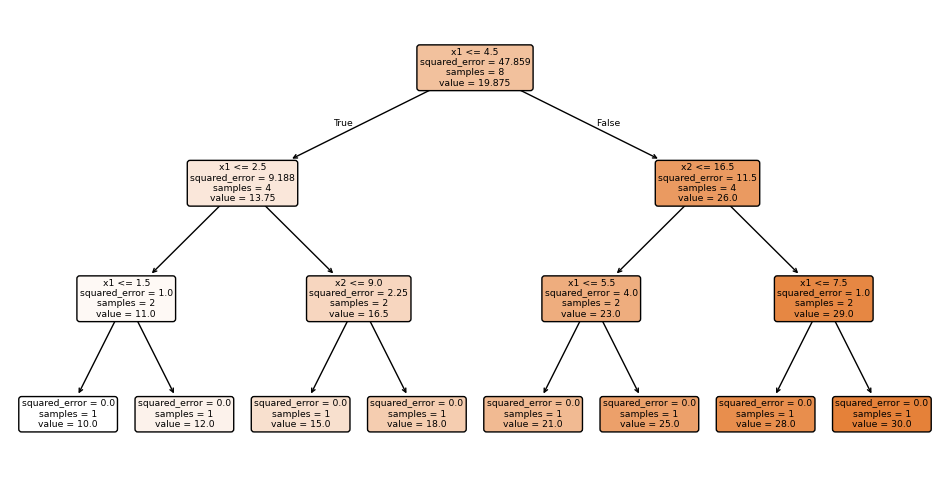

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Given dataset
X = np.array([[1, 5], [2, 6], [3, 8], [4, 10], [5, 12], [6, 15], [7, 18], [8, 20]])  # (x1, x2)
y = np.array([10, 12, 15, 18, 21, 25, 28, 30])

# Create and train a fully grown regression tree
regressor = DecisionTreeRegressor()
regressor.fit(X, y)

# Visualize the regression tree
plt.figure(figsize=(12, 6))
plot_tree(regressor, feature_names=['x1', 'x2'], filled=True, rounded=True)
plt.show()

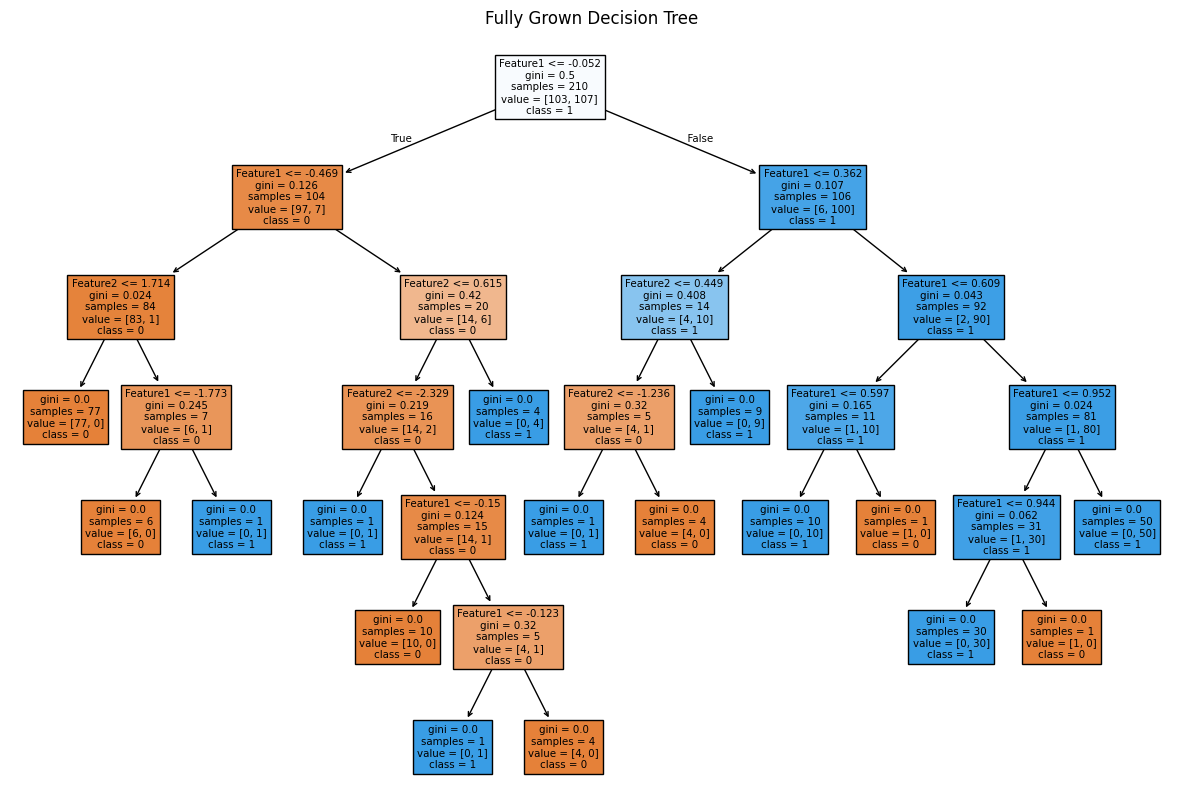

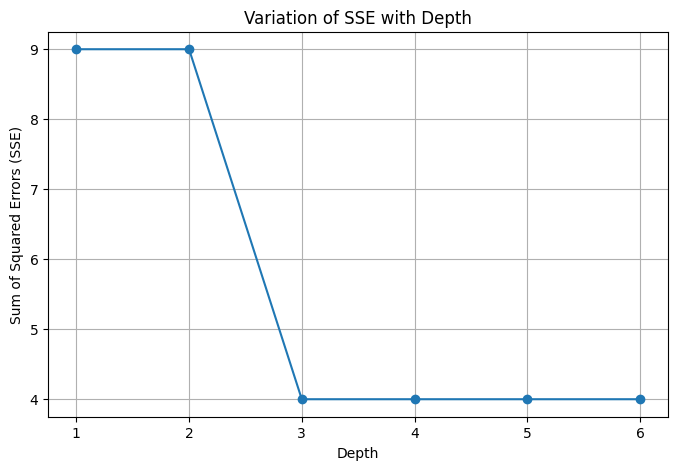

Optimal pruning depth: 1


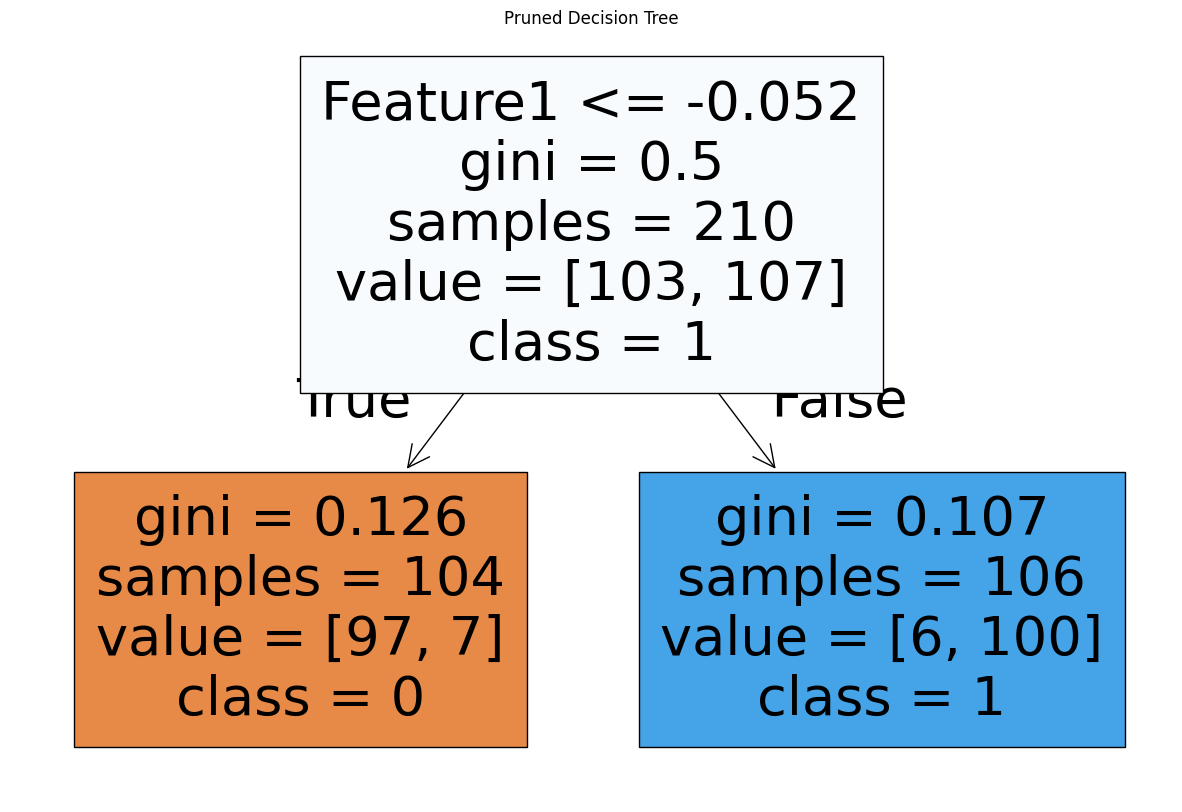

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load datasets
train_path = "A4_train_74e601c5-f446-4f34-a53b-28ce05d1cec4.csv"
test_path = "A4_test_a4d66d34-6db0-44a4-a7c1-0aa26ab8d705.csv"

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# Assuming the last column is the target variable
y_train = df_train.iloc[:, -1]
X_train = df_train.iloc[:, :-1]
y_test = df_test.iloc[:, -1]
X_test = df_test.iloc[:, :-1]

# Train a fully grown binary classification tree
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

# Visualize the full tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=['0', '1'])
plt.title("Fully Grown Decision Tree")
plt.show()

# Compute SSE at each depth
sse_values = []
depths = range(1, clf.get_depth() + 1)

for depth in depths:
    temp_clf = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    temp_clf.fit(X_train, y_train)
    y_pred = temp_clf.predict(X_test)
    sse = mean_squared_error(y_test, y_pred) * len(y_test)
    sse_values.append(sse)

# Plot SSE variation with depth
plt.figure(figsize=(8, 5))
plt.plot(depths, sse_values, marker='o', linestyle='-')
plt.xlabel("Depth")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Variation of SSE with Depth")
plt.grid()
plt.show()

# Determine optimal pruning depth (where SSE change is minimal)
sse_changes = np.abs(np.diff(sse_values))
optimal_depth = depths[np.argmin(sse_changes)]
print(f"Optimal pruning depth: {optimal_depth}")

# Train and visualize pruned tree
pruned_clf = DecisionTreeClassifier(criterion='gini', max_depth=optimal_depth, random_state=42)
pruned_clf.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(pruned_clf, filled=True, feature_names=X_train.columns, class_names=['0', '1'])
plt.title("Pruned Decision Tree")
plt.show()
